Data set 1 has 50000 samples with a sample rate of 10000Hz. Top 3 frequencies: 0.0Hz, 3.0Hz, 25.0Hz.
Data set 2 has 16500 samples with a sample rate of 3300Hz. Top 3 frequencies: 0.0Hz, 0.2Hz, 3.0Hz.
Data set 3 has 20000 samples with a sample rate of 2500Hz. Top 3 frequencies: 0.0Hz, 0.5Hz, 1.5Hz.
Data set 4 has 4800 samples with a sample rate of 400Hz. Top 3 frequencies: 0.08333333333333333Hz, 0.0Hz, 0.16666666666666666Hz.


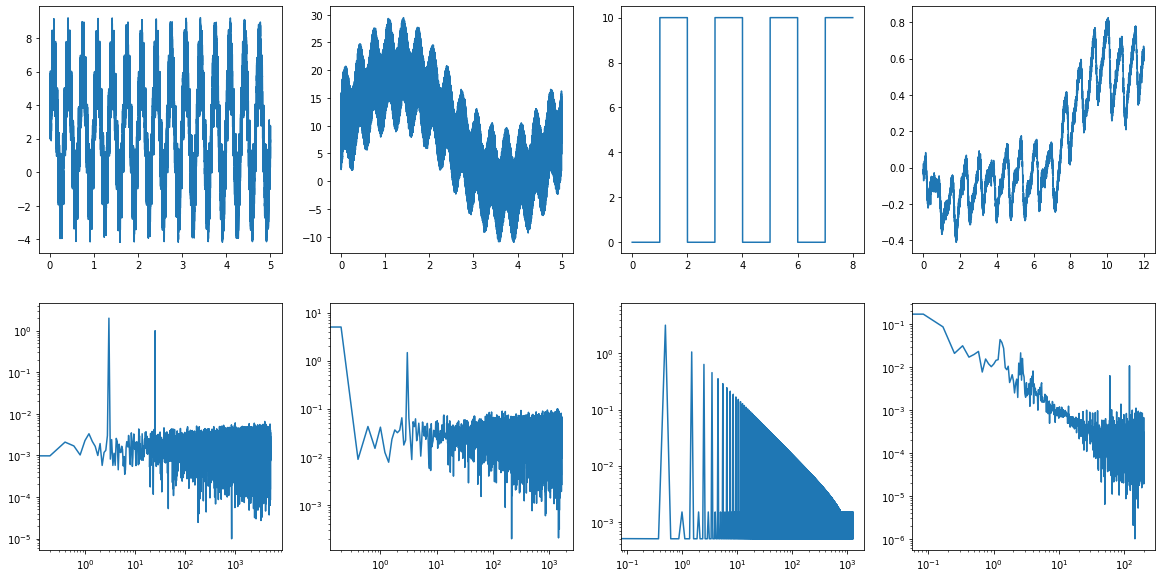

In [75]:
import csv
import matplotlib.pyplot as plt # for plotting
import numpy as np # for sine function

plt.rcParams['figure.figsize'] = [20, 10]

filenames = ['sigA.csv','sigB.csv','sigC.csv','sigD.csv']

# Create csv read function
def csvRead(filename): 
    with open(filename) as f:
    # open the csv file
        reader = csv.reader(f)
        data = []
        for row in reader:
            # read the rows 1 one by one
            data.append([float(row[0]),float(row[1])])
    return data

# Create list of all data
sig = []
for i in filenames:
    sig.append(csvRead(i))

fig, ax = plt.subplots(2,4) # Create 2 by 4 (data and FFT for each data set, 4 sets of data)

# We want to graph all the data using subplots
for i in range(len(sig)): # for each data set
    data = np.array(sig[i]) # Create np.array
    time = data[:,0] # time is the first column
    voltage = data[:,1] # voltage is the second column
    ax[0,i].plot(time,voltage) # plotting the raw data
    samples = np.size(time) # number of samples
    totTime = time[-1]-time[0] # total time for all samples
    sampleRate = int(samples/totTime) # samples per second
    fftDecomp = np.fft.fft(voltage)/samples # fft normalized by number of samples
    fftDecomp = abs(fftDecomp[range(int(samples/2))]) # 
    frequencies = np.arange(samples)*sampleRate/samples #
    frequencies = frequencies[range(int(samples/2))] # 
    ax[1,i].loglog(frequencies,fftDecomp) # plotting the raw data
    # Get the top three frequencies
    sorted = np.sort(fftDecomp) # sort the magnitudes into ascending order
    index1 = np.where(fftDecomp==sorted[-1])[0][0]
    top1 = frequencies[index1]
    index2 = np.where(fftDecomp==sorted[-2])[0][0]
    top2 = frequencies[index2]
    index3 = np.where(fftDecomp==sorted[-3])[0][0]
    top3 = frequencies[index3]
    print(f"Data set {i+1} has {samples} samples with a sample rate of {sampleRate}Hz. Top 3 frequencies: {top1}Hz, {top2}Hz, {top3}Hz.")
plt.show()

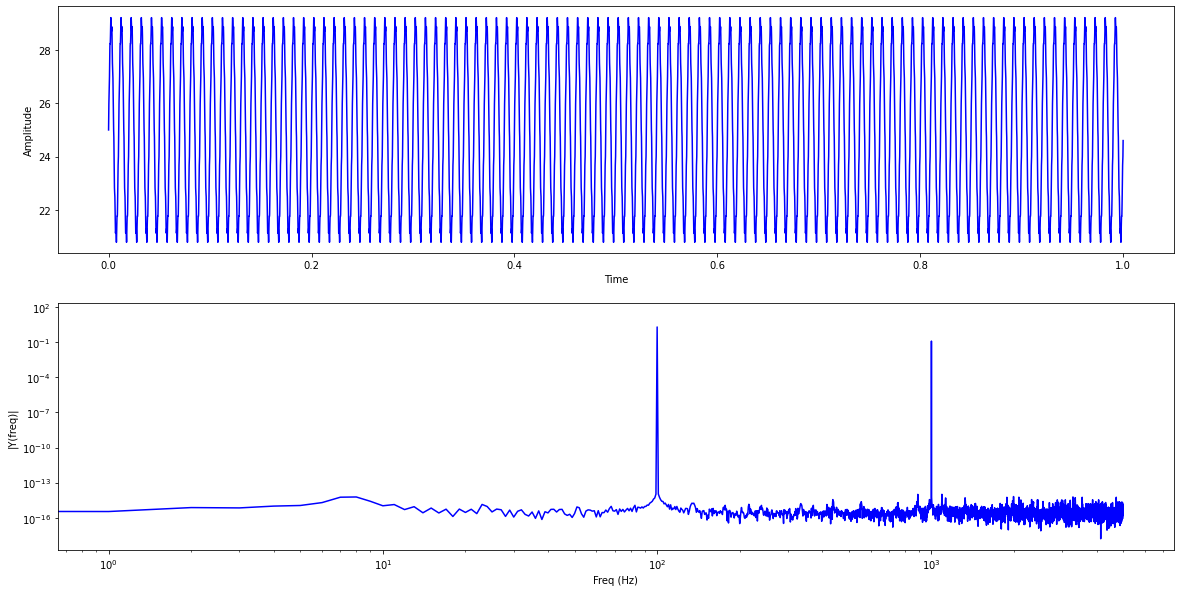

In [76]:
dt = 1.0/10000.0 # 10kHz
t = np.arange(0.0, 1.0, dt) # 10s
# a constant plus 100Hz and 1000Hz
s = 4.0 * np.sin(2 * np.pi * 100 * t) + 0.25 * np.sin(2 * np.pi * 1000 * t) + 25

Fs = 10000 # sample rate
Ts = 1.0/Fs; # sampling interval
ts = np.arange(0,t[-1],Ts) # time vector
y = s # the data to make the fft from
n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range
Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(int(n/2))]

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t,y,'b')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax2.loglog(frq,abs(Y),'b') # plotting the fft
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
plt.show()